<a href="https://colab.research.google.com/github/saikiran162005/Predictive-Analysis/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Accuracy: 0.55


KNeighbors Accuracy: 0.55


Naive Bayes Accuracy: 0.55


Support Vector Machine Accuracy: 0.55


                 Model  Score
3                  SVM   0.65
0  Logistic Regression   0.55
1                  KNN   0.55
2          Naive Bayes   0.55




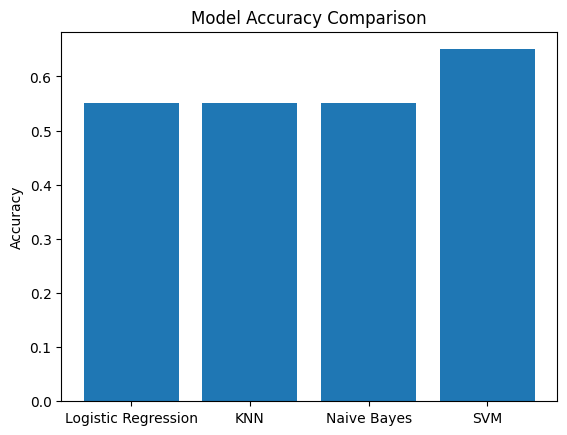

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# LOAD
df = pd.read_csv("/content/Flight_data.csv")
df.head()

le = LabelEncoder()
df['Churned'] = le.fit_transform(df['Churned'])

drop_cols = ['Customer ID', 'Name', 'Departure Date']

df = df.drop(columns=drop_cols)

X = df.drop('Churned', axis=1)
y = df['Churned']

X_encoded = pd.get_dummies(X, drop_first=True)

# SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
#classification_report(y_test, y_pred, zero_division=0)
print("\n")

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
print("KNeighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\n")

# NAIVE BAYES
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n")

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n")


results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
    'Score': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm)
    ]
})

print(results.sort_values(by='Score', ascending=False))
print("\n")

#VISUALIZATION
plt.figure()
plt.bar(results["Model"], results["Score"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
